# MyQLM converter

## Minimal code

This section demonstrates the basic usage of the MyQLM converter with a simple example. We'll create a single-qubit circuit that applies an X gate and convert it to a Perceval photonic processor.

Note that this notebook requires the installation of MyQLM (which can be easily done with `pip install myqlm`). This repository can also be installed with the command: `pip install .[MyQLM-bridge]` to automatically install MyQLM.

In [1]:
# Import required libraries
import qat.lang.AQASM as qataqasm
import perceval as pcvl
from perceval_interop import MyQLMConverter

In [2]:
# Create a MyQLM quantum program
qprog = qataqasm.Program()

# Allocate quantum bits
qbits = qprog.qalloc(1)  # Allocate 1 qubit

# Apply quantum gate (X gate = NOT gate)
qprog.apply(qataqasm.X, qbits[0])  # Apply X gate to flip |0⟩ → |1⟩

# Convert program to MyQLM circuit
myqlm_circuit = qprog.to_circ()
myqlm_circuit.display()

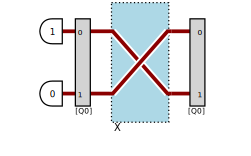

In [3]:
# Convert MyQLM circuit to Perceval processor
myqlm_converter = MyQLMConverter(backend_name="Naive")
converted_processor = myqlm_converter.convert(myqlm_circuit, use_postselection=True)

pcvl.pdisplay(converted_processor, recursive=True)

## Circuit to generate GHZ State

In this section, we show how circuits from myQLM can be converted into Perceval circuits. To do so, we take the example of a simple gate-based circuit producing GHZ states. We then show the translation to a linear optical circuit. We also show the equivalence between the two circuits (gate-based and perceval).

In [4]:
from perceval.algorithm import Sampler

### Conversion from MyQLM Circuit to Perceval

Analogous to `QiskitConverter`, employ a `MyQLMConverter` object to convert a MyQLM circuit to a Perceval processor with each qubit of the circuit represented by 2 modes and additional modes for ancillary photons to perform deterministically two-qubit gates. (Read in the qiskit converter notebook for a discussion on how ancillary modes are set).

### Circuit to generate GHZ State in MyQLM

In [5]:
# Create a myqlm program
qprog = qataqasm.Program()

# Allocate qbits to the Program
qbits = qprog.qalloc(3)

# Add gates
qprog.apply(qataqasm.H, qbits[0])
qprog.apply(qataqasm.CNOT, qbits[0], qbits[1])
qprog.apply(qataqasm.CNOT, qbits[0], qbits[2])

# Convert program to myqlm circuit
myqlm_circuit = qprog.to_circ()

myqlm_circuit.display()

### Conversion of Myqlm circuit to Perceval

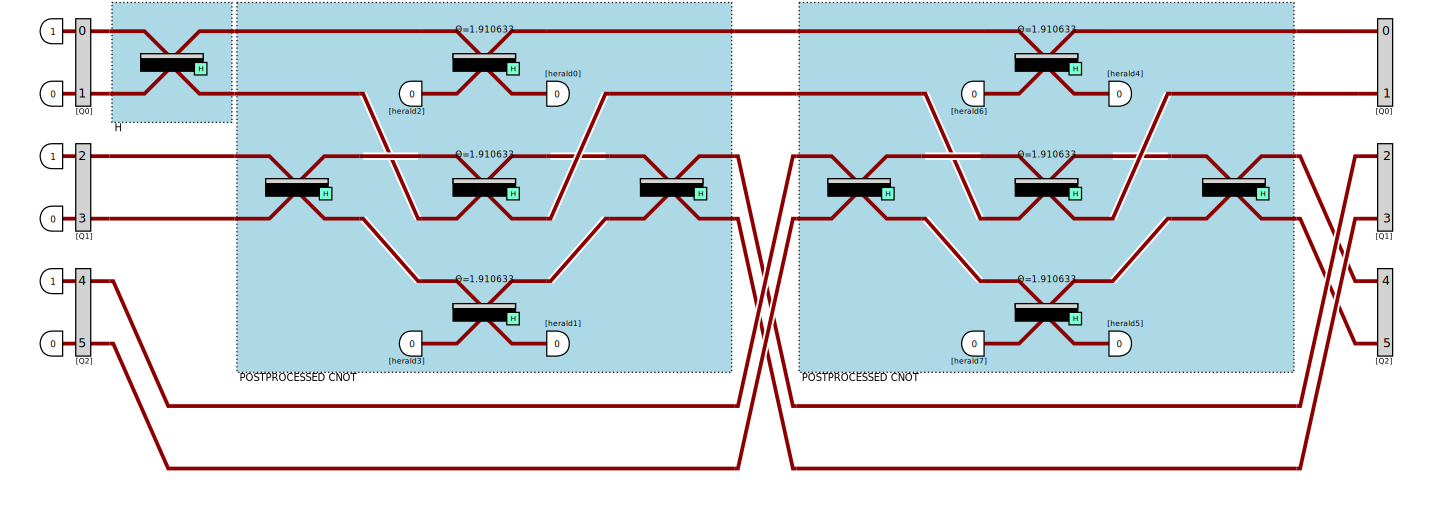

In [6]:
myqlm_converter = MyQLMConverter(backend_name="Naive")
converted_processor = myqlm_converter.convert(myqlm_circuit, use_postselection=True)
pcvl.pdisplay(converted_processor, recursive=True)

In [7]:
# computing results with converted processor from myqlm
converted_processor.with_input(pcvl.LogicalState([0,0,0]))

sampler = Sampler(converted_processor)

output_distribution_myqlm_pcvl = sampler.probs()["results"]
pcvl.pdisplay(output_distribution_myqlm_pcvl, precision=1e-2, max_v = 4)

Note: The result is exactly the same as previously obtained from converter from Qiskit and is also the expected result.

### Few remarks
- Only the following gates are supported:
    - 1-Qubit gates
    - 2-Qubits gates: CNOT, CSIGN, SWAP
    - 3-Qubits gate: Toffoli
